# Lending_club_case_study

## Install additional libraries

In [ ]:
!pip install autoviz==0.0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from autoviz.AutoViz_Class import AutoViz_Class
from numpy import mean
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

## Creating dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/self study/UpGrad/PG Programme in Machine Learning & Artificial Intelligence/Group_Work_001_LendingClubCaseStudy_March2023/DataFile/loan.csv')

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [ ]:
df.shape

(39717, 111)

In [ ]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Handle missing values

In [ ]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [ ]:
limit= len(df)*0.7                      ## we will remove those columns which has 30% or beyond missing values
df=df.dropna(thresh=limit,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

## Remove unnecessary features

In [ ]:
for column in df:
  print('column: {},total unique_values{} and total_number_of_unique_values{}'.format(column,df[column].nunique(),df[column].unique()))
                 
  # it will help us to decide which columns are useful 
  # Removing those columns which have one categorical values or large portion of data belongs to single category or variable  
  # Removing customer behaviour variables

column: id,total unique_values39717 and total_number_of_unique_values[1077501 1077430 1077175 ...   90395   90376   87023]
column: member_id,total unique_values39717 and total_number_of_unique_values[1296599 1314167 1313524 ...   90390   89243   86999]
column: loan_amnt,total unique_values885 and total_number_of_unique_values[ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  82

In [ ]:
df.drop(['id','member_id','grade','emp_title','pymnt_plan','url',
         'zip_code','addr_state','inq_last_6mths','initial_list_status','out_prncp_inv',
         'total_pymnt_inv','total_rec_late_fee','recoveries','collection_recovery_fee','collections_12_mths_ex_med',
         'application_type','tax_liens','chargeoff_within_12_mths','delinq_amnt','policy_code','acc_now_delinq',
         'revol_bal','revol_util','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',
         'earliest_cr_line','pub_rec','pub_rec_bankruptcies','out_prncp','total_acc','open_acc','delinq_2yrs','total_rec_int',
         'total_rec_prncp','installment','total_pymnt'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   sub_grade            39717 non-null  object 
 6   emp_length           38642 non-null  object 
 7   home_ownership       39717 non-null  object 
 8   annual_inc           39717 non-null  float64
 9   verification_status  39717 non-null  object 
 10  issue_d              39717 non-null  object 
 11  loan_status          39717 non-null  object 
 12  purpose              39717 non-null  object 
 13  title                39706 non-null  object 
 14  dti                  39717 non-null  float64
dtypes: float64(3), int64(2), object(10)


In [ ]:
df.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                    11
dti                       0
dtype: int64

## Filling missing values

In [ ]:
df['emp_length'].fillna(df['emp_length'].mode()[0],inplace=True)           ## categorical columns filled with mode
df['title'].fillna(df['title'].mode()[0],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   sub_grade            39717 non-null  object 
 6   emp_length           39717 non-null  object 
 7   home_ownership       39717 non-null  object 
 8   annual_inc           39717 non-null  float64
 9   verification_status  39717 non-null  object 
 10  issue_d              39717 non-null  object 
 11  loan_status          39717 non-null  object 
 12  purpose              39717 non-null  object 
 13  title                39717 non-null  object 
 14  dti                  39717 non-null  float64
dtypes: float64(3), int64(2), object(10)


In [ ]:
df['issue_d'].value_counts()

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

### Convert loan date column dtype to date-time format and extract month from each observation

In [ ]:
# df['issue_d']=pd.to_datetime(df['issue_d'],errors = 'coerce')

## Remove all observations which have current loan_status 

In [ ]:
df=df[df['loan_status']!='Current']   ## we don't know whether borrowers will get default or not

In [ ]:
df.shape

(38577, 15)

## Correlation matrix will give us idea that how numeric features are correlated with each other


In [ ]:
df_corr=df.corr()
df_corr

,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,dti
loan_amnt,1.000000,0.981790,0.937922,0.268999,0.062436
funded_amnt,0.981790,1.000000,0.956172,0.264798,0.062194
funded_amnt_inv,0.937922,0.956172,1.000000,0.251981,0.070663
annual_inc,0.268999,0.264798,0.251981,1.000000,-0.121530
dti,0.062436,0.062194,0.070663,-0.121530,1.000000


## Checking Outliers --- using box-plot

In [ ]:
df1=df.select_dtypes(exclude='object')   ## creating dataframe which include only numeric columns

In [ ]:
df2=df.select_dtypes(include='object')   ## creating dataframe which includes only categorical columns

In [ ]:
col=df1.columns.values           ## Assign all column values to col

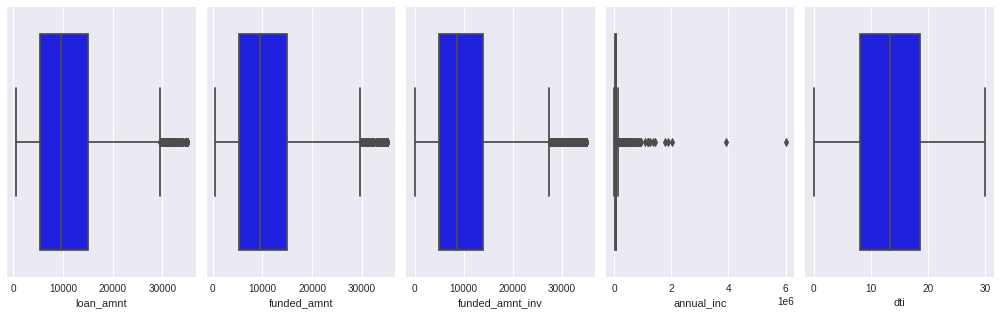

In [ ]:
plt.figure(figsize=(14,30))
for i in range(0,len(col)):
  plt.subplot(7,5,i+1)
  ax=sns.boxplot(df[col[i]],color='blue')
  plt.tight_layout()  

## Removing outliers using Percentile method

In [ ]:
for col in df1.columns:
  percentile=df[col].quantile([0.01,0.98]).values      # we will not remove outliers using IQR method
  df[col][df[col]<=percentile[0]]=percentile[0]        # We used percentile method in which outliers below 1st percentile we bring it to 1st perc.
  df[col][df[col]>=percentile[1]]=percentile[1]        # Outliers beyond 98th percentile we brought it to the 98th percentile

In [ ]:
col=df1.columns.values 

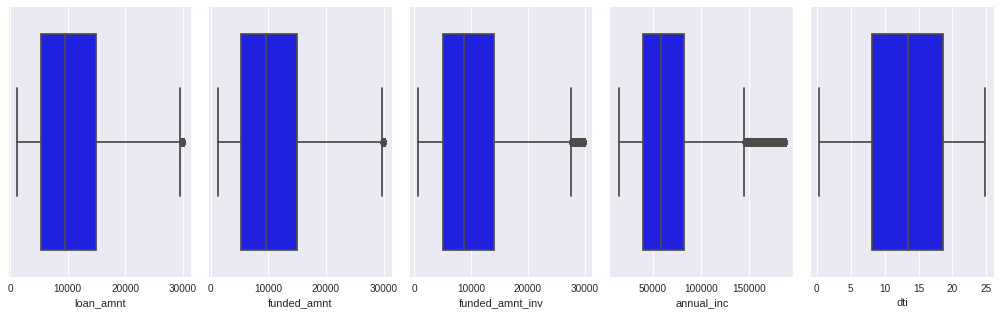

In [ ]:
plt.figure(figsize=(14,30))
for i in range(0,len(col)):
  plt.subplot(7,5,i+1)
  ax=sns.boxplot(df[col[i]],color='blue')
  plt.tight_layout()  

# Checking skewness

In [ ]:
df.skew()            ## after removing outliers we can see that we have removed skewness as well

loan_amnt          0.904223
funded_amnt        0.935121
funded_amnt_inv    0.969106
annual_inc         1.315112
dti               -0.077463
dtype: float64

### we can remove this skewness using power_transform method also

# EDA

## Let's create csv file and apply AutoViz library for EDA

In [ ]:
df.to_csv('loan_updated.csv')

In [ ]:
av=AutoViz_Class()

Shape of your Data Set: (38577, 16)
Classifying variables in data set...
    16 Predictors classified...
        This does not include the Target column(s)
    5 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6
Could not draw Bar Plots
Time to run AutoViz (in seconds) = 3.242


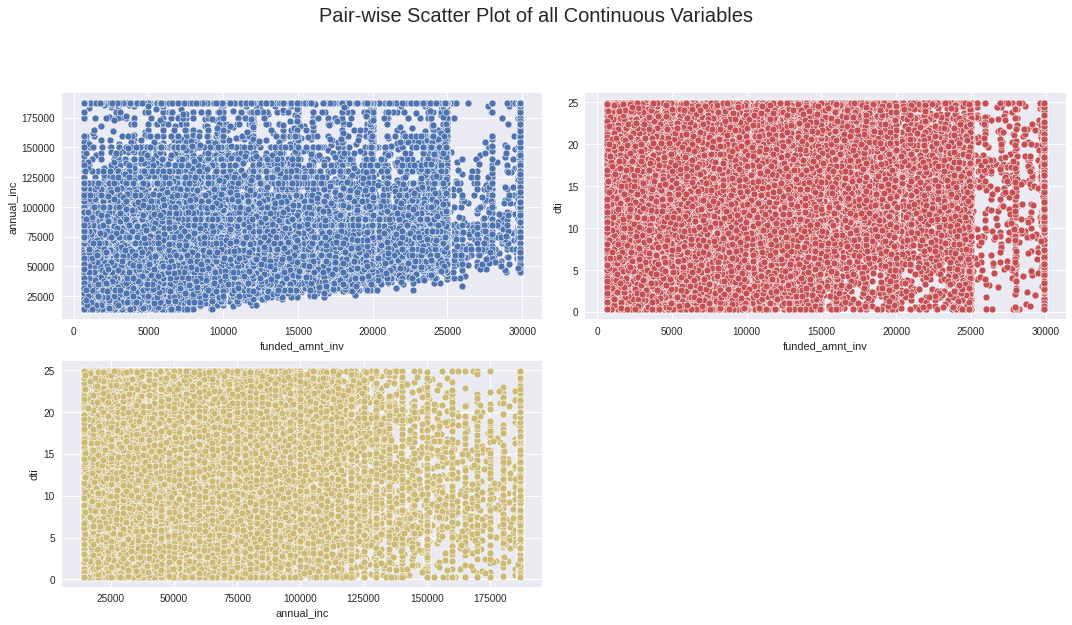

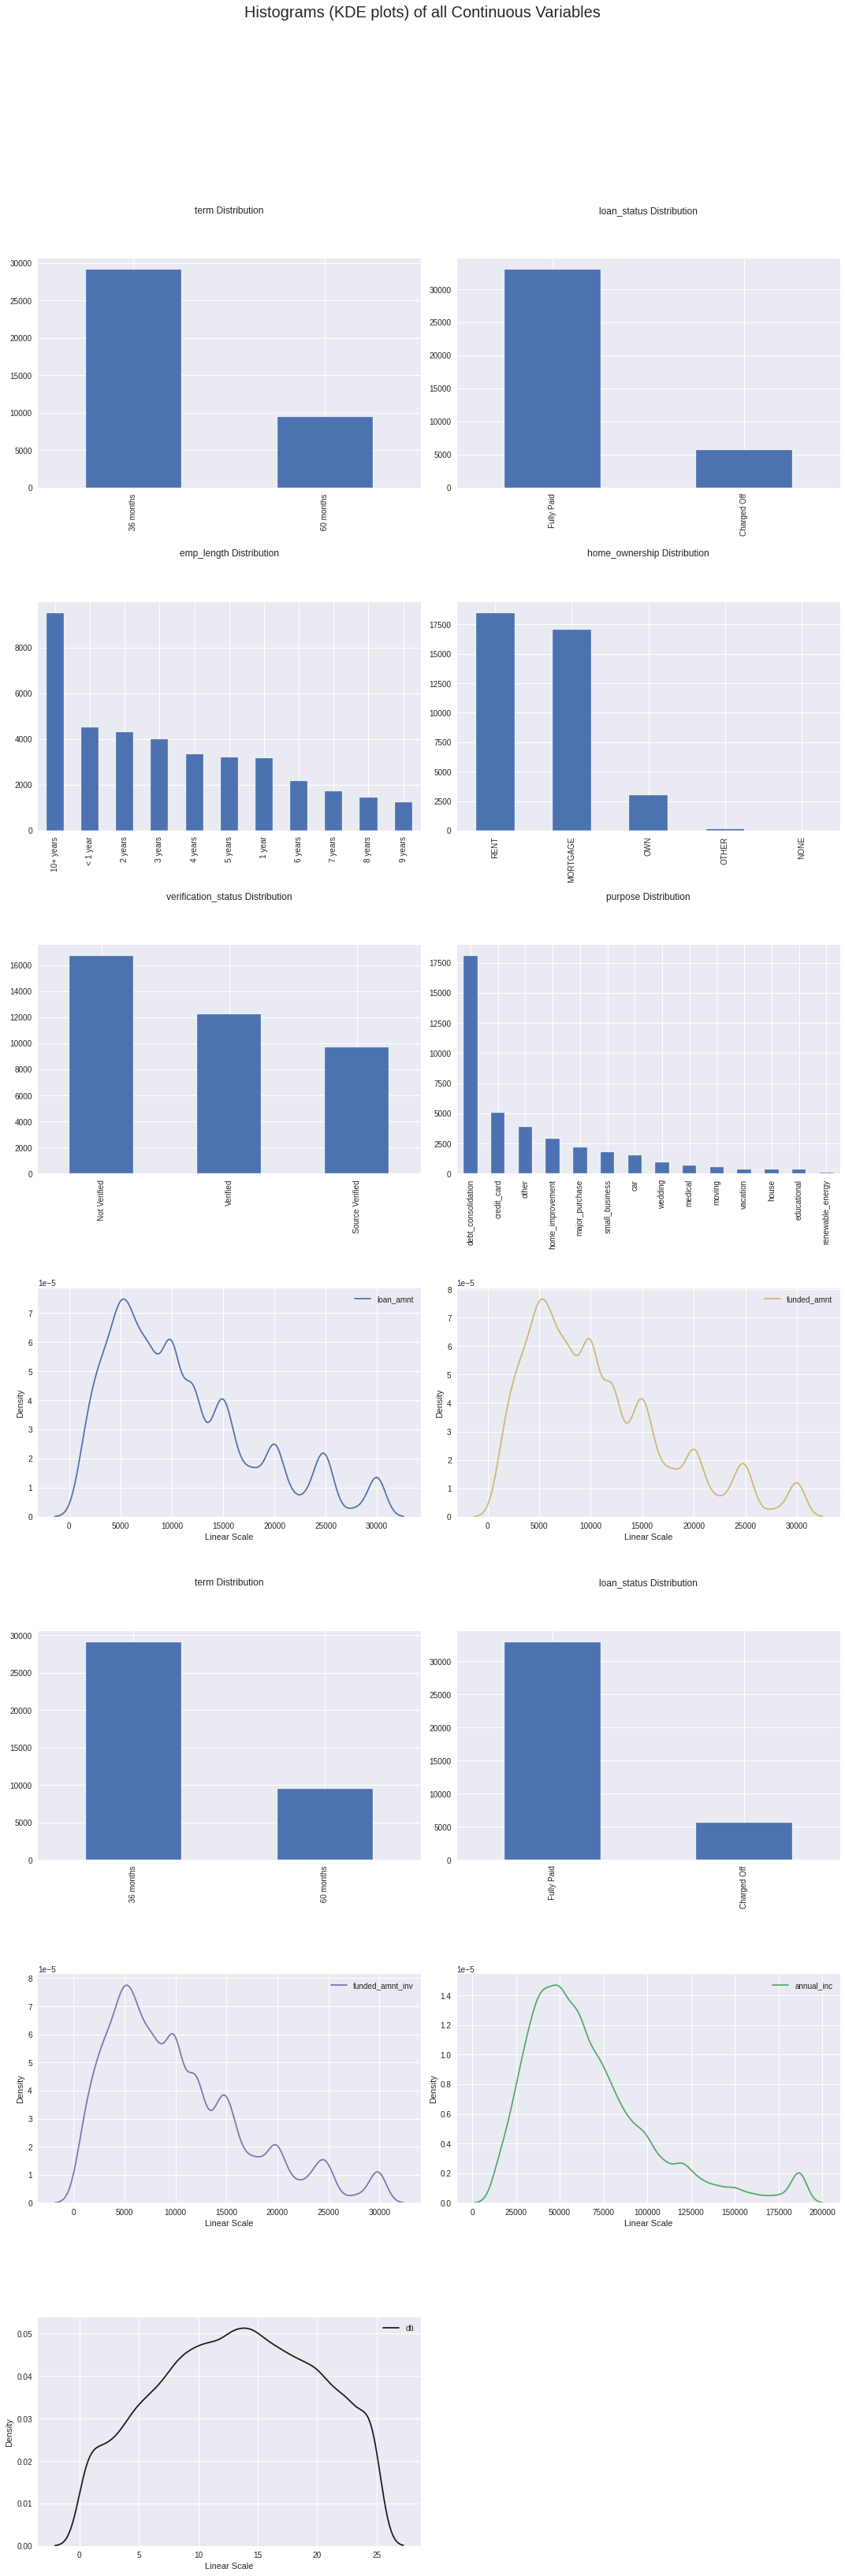

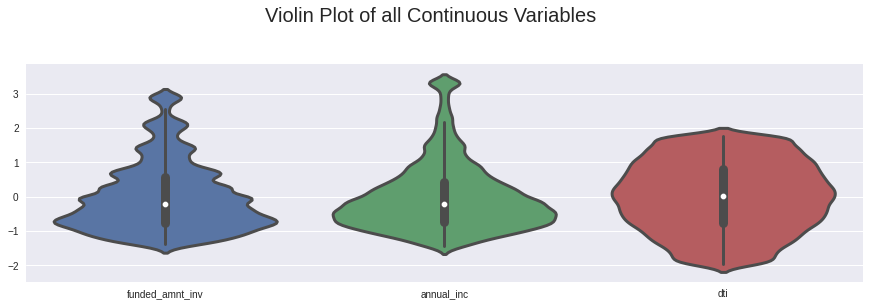

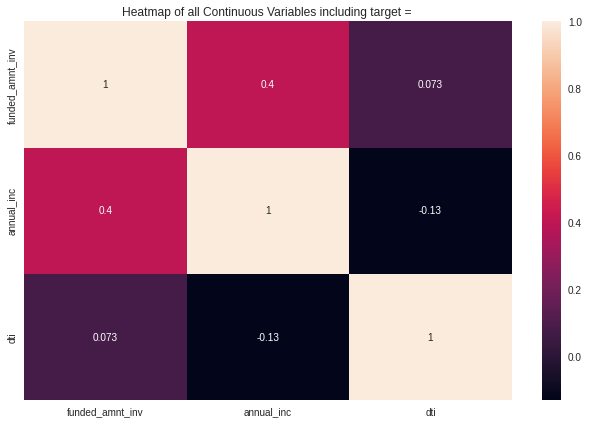

<Figure size 1080x8640 with 0 Axes>

In [ ]:
filename="/content/loan_updated.csv"
sep=",",
dft=av.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=40
)

# Segmented Univariate Analysis for categorical columns using count plot

In [ ]:
df2.columns            ## all required categorical columns

Index(['term', 'int_rate', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title'],
      dtype='object')

### 1) 'term'

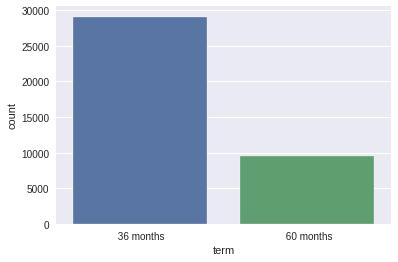

In [ ]:
sns.countplot(x ='term', data = df)     
plt.show()

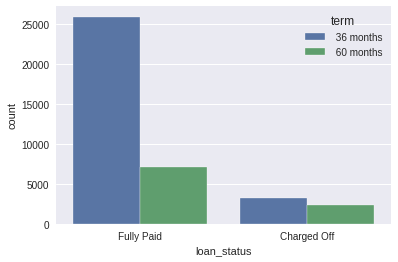

In [ ]:
sns.countplot(x='loan_status', hue='term',data=df)
plt.show()

### 2) 'Sub_grade'

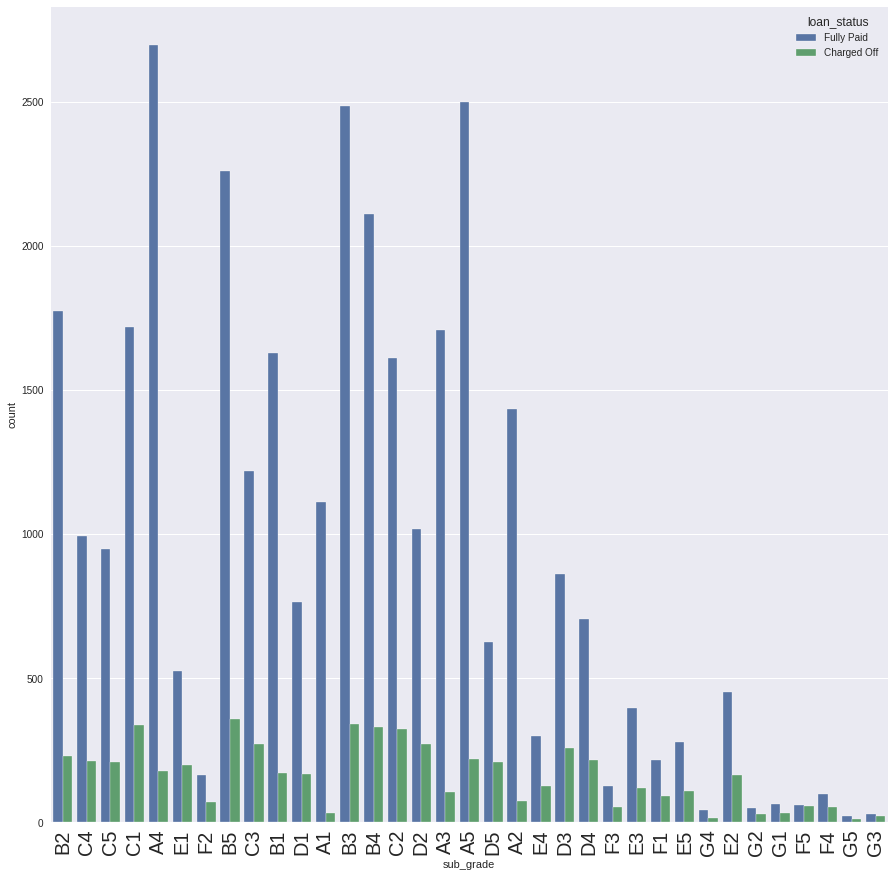

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x='sub_grade', hue='loan_status',data=df)
plt.xticks(rotation=90,fontsize=20)
plt.show()

### 3) 'Emp_length'

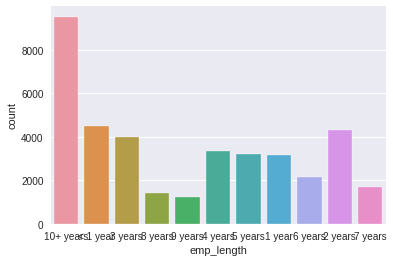

In [ ]:
sns.countplot(x ='emp_length', data = df,)     
plt.show()

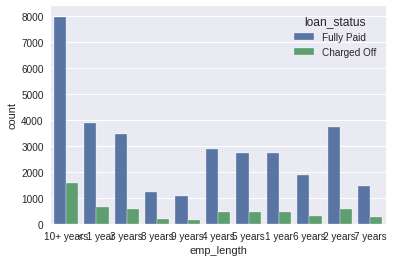

In [ ]:
sns.countplot(x='emp_length', hue='loan_status',data=df)
plt.show()

4) 'Home Ownership'

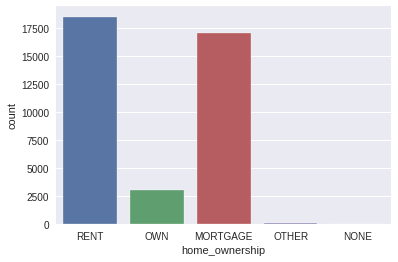

In [ ]:
sns.countplot(x ='home_ownership', data = df)     
plt.show()

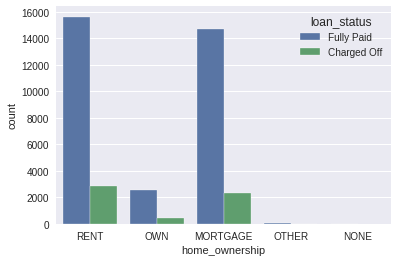

In [ ]:
sns.countplot(x='home_ownership', hue='loan_status',data=df)
plt.show()

5) 'verification_status'

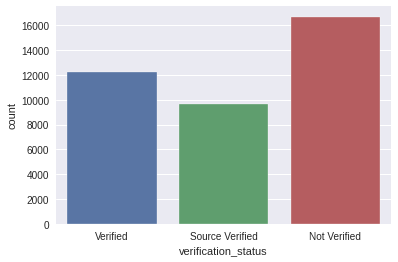

In [ ]:
sns.countplot(x ='verification_status', data = df)     
plt.show()

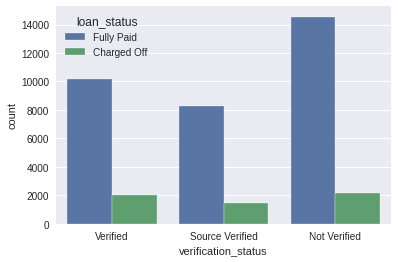

In [ ]:
sns.countplot(x='verification_status', hue='loan_status',data=df)
plt.show()

6) Purpose

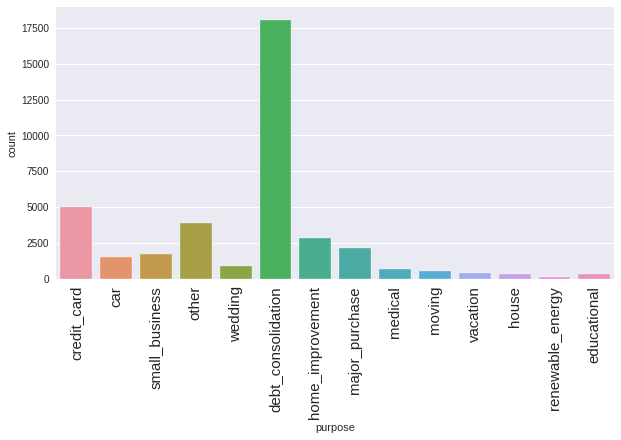

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x ='purpose', data = df)
plt.xticks(rotation=90,fontsize=15)
plt.show()

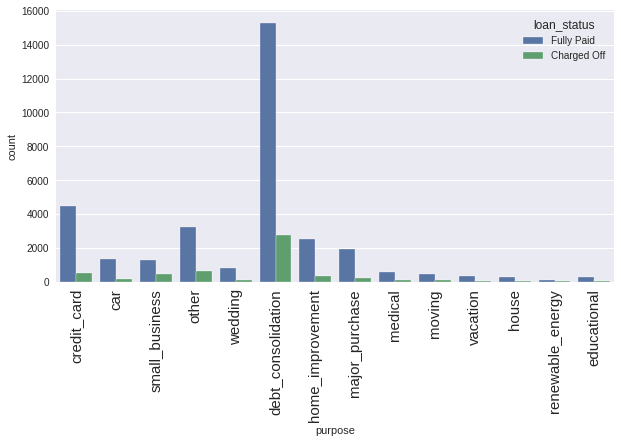

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='purpose', hue='loan_status',data=df)
plt.xticks(rotation=90,fontsize=15)
plt.show()

6) Interest rate

In [ ]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
df_new=df[df['loan_status']=='Charged Off']

In [ ]:
df_new.shape

(5627, 15)

## Now check on which interest_rate highest amount of default occured

In [ ]:
df_new['int_rate'].value_counts().head(30)

13.49%    127
11.49%    127
10.99%     95
11.71%     91
11.99%     76
14.27%     74
12.69%     72
16.77%     71
12.99%     69
18.25%     62
16.49%     61
15.99%     59
17.49%     59
9.99%      58
16.89%     57
13.99%     56
12.42%     55
11.86%     55
17.27%     54
7.51%      54
15.27%     52
10.37%     51
7.90%      49
8.49%      49
10.59%     47
13.98%     46
10.65%     46
16.45%     45
15.21%     45
12.68%     44
Name: int_rate, dtype: int64

7) Loan Month

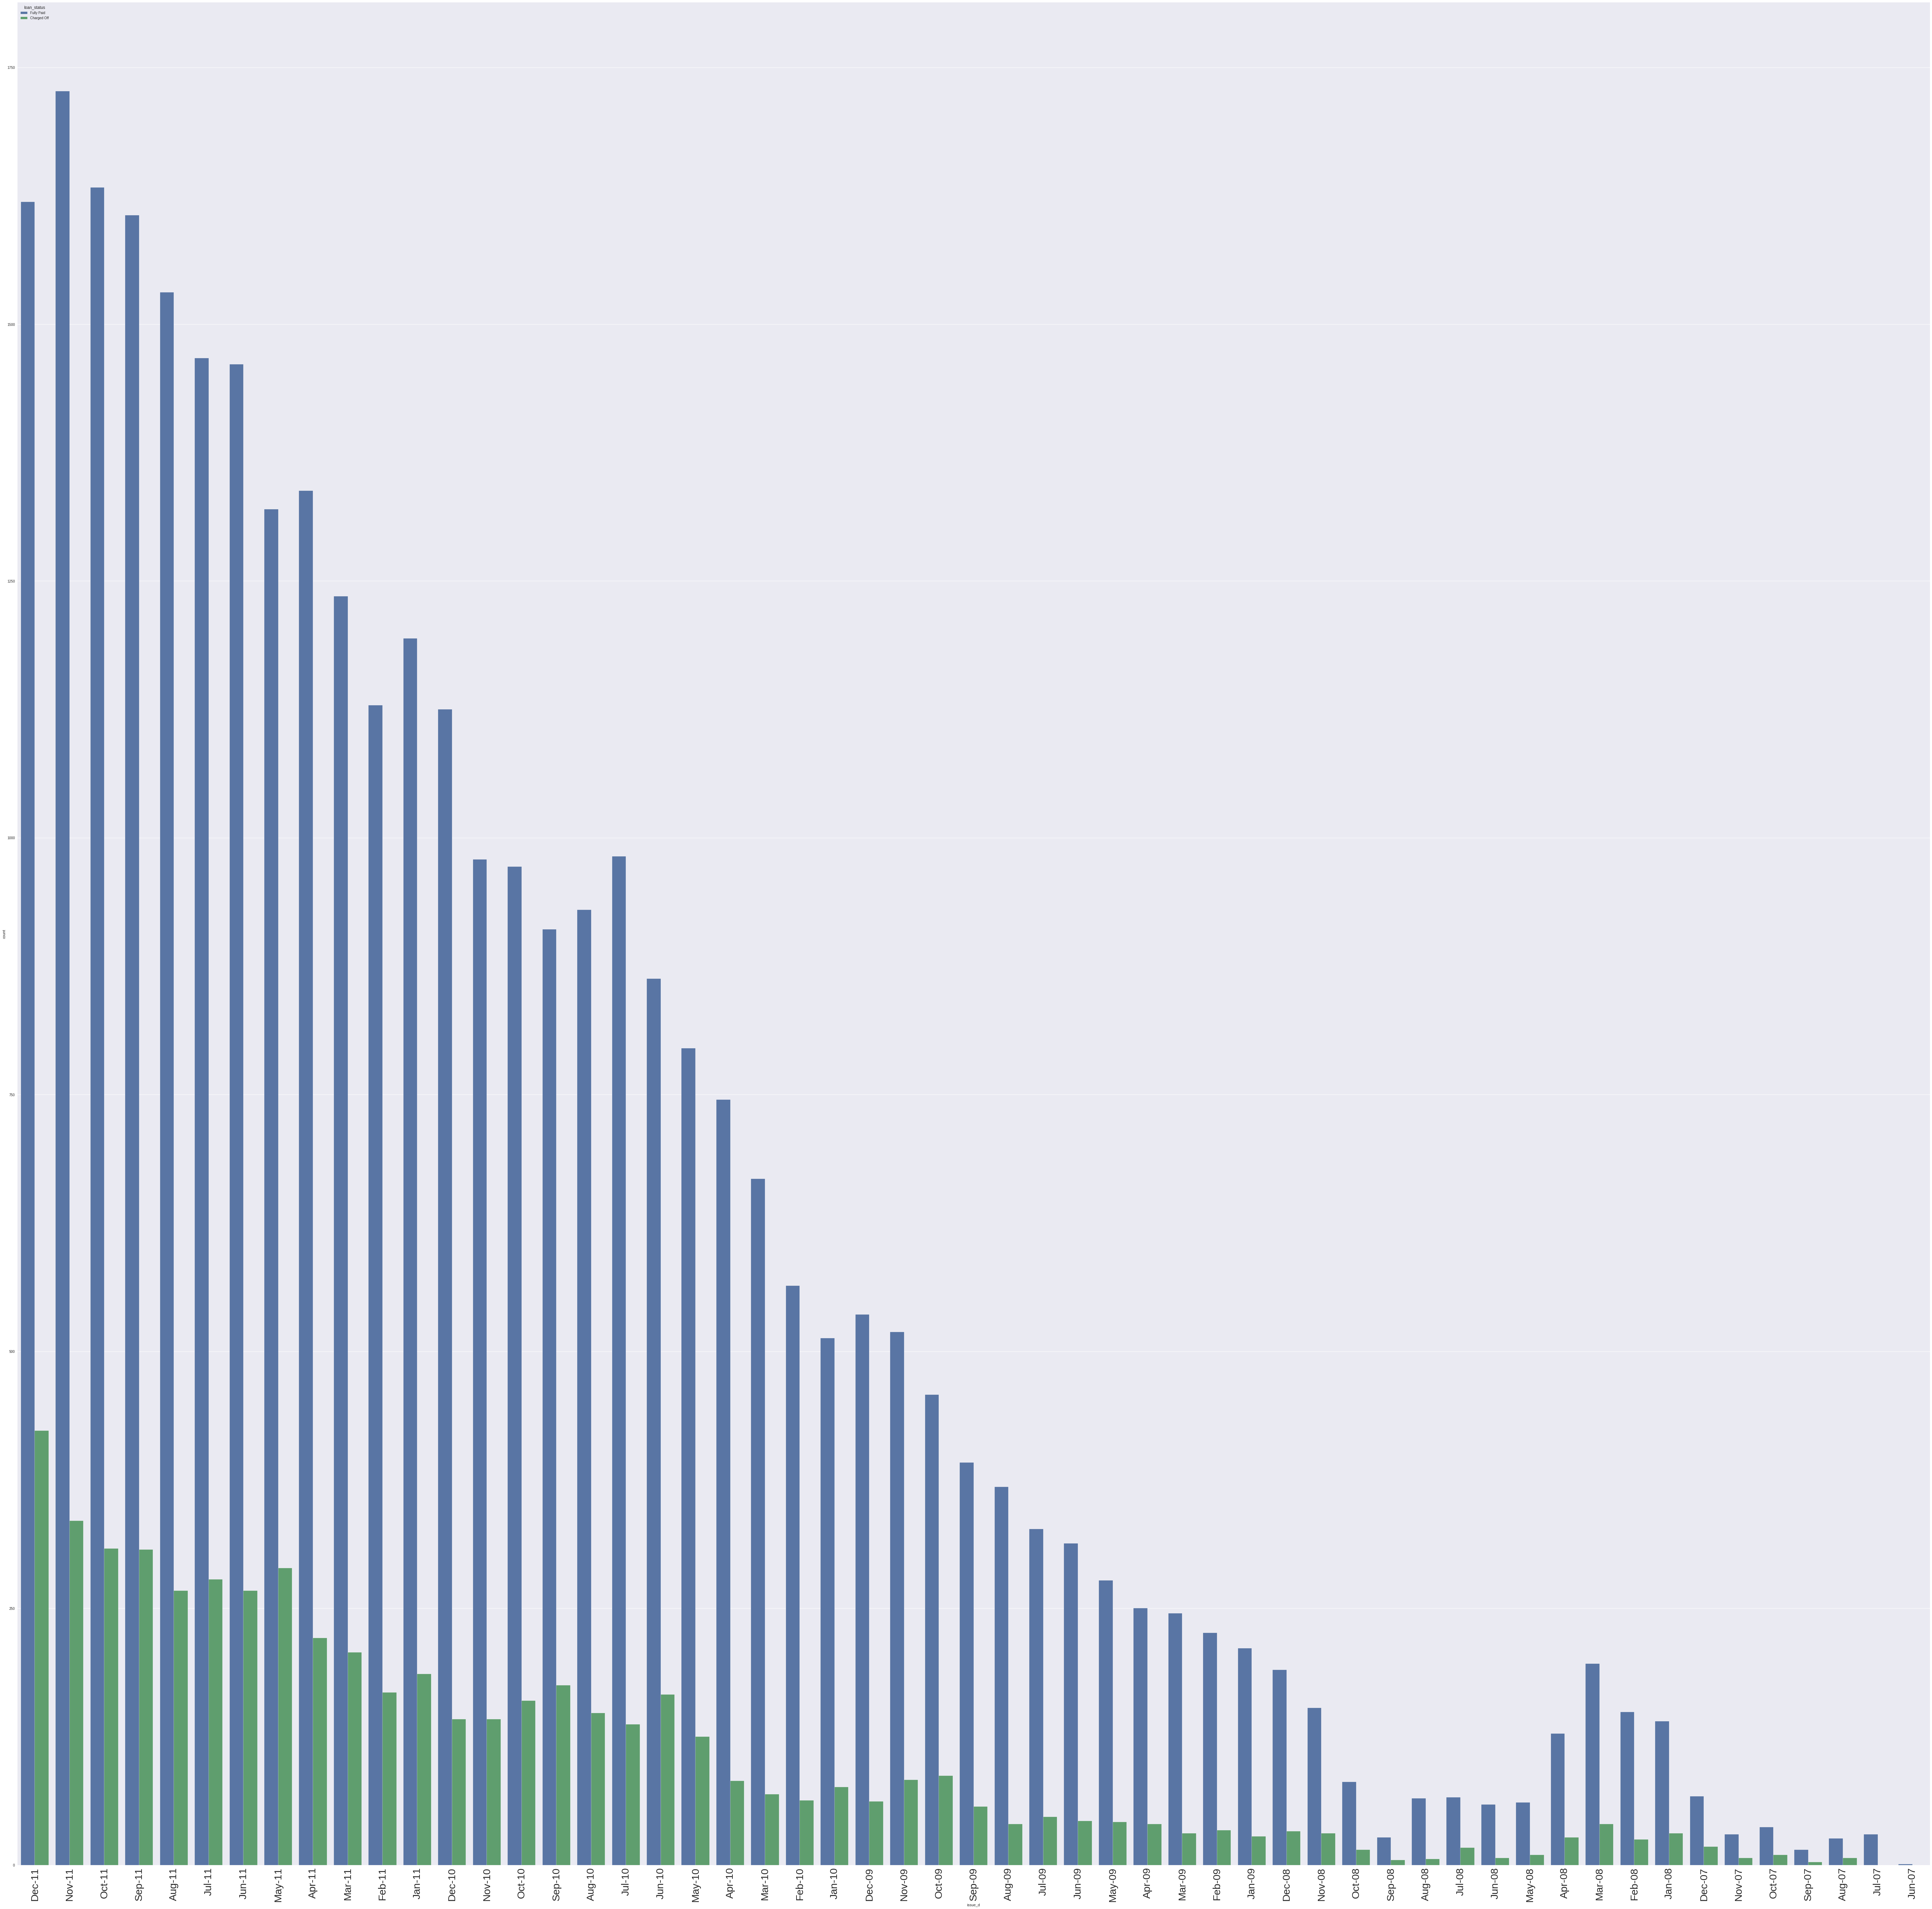

In [ ]:
plt.figure(figsize=(100,100))
sns.countplot(x='issue_d', hue='loan_status',data=df)
plt.xticks(rotation=90,fontsize=30)
plt.show()

# Uni-variate analysis for numeric features using distribution plot

In [ ]:
col_num=list(df1.columns)                                 ## All numeric columns

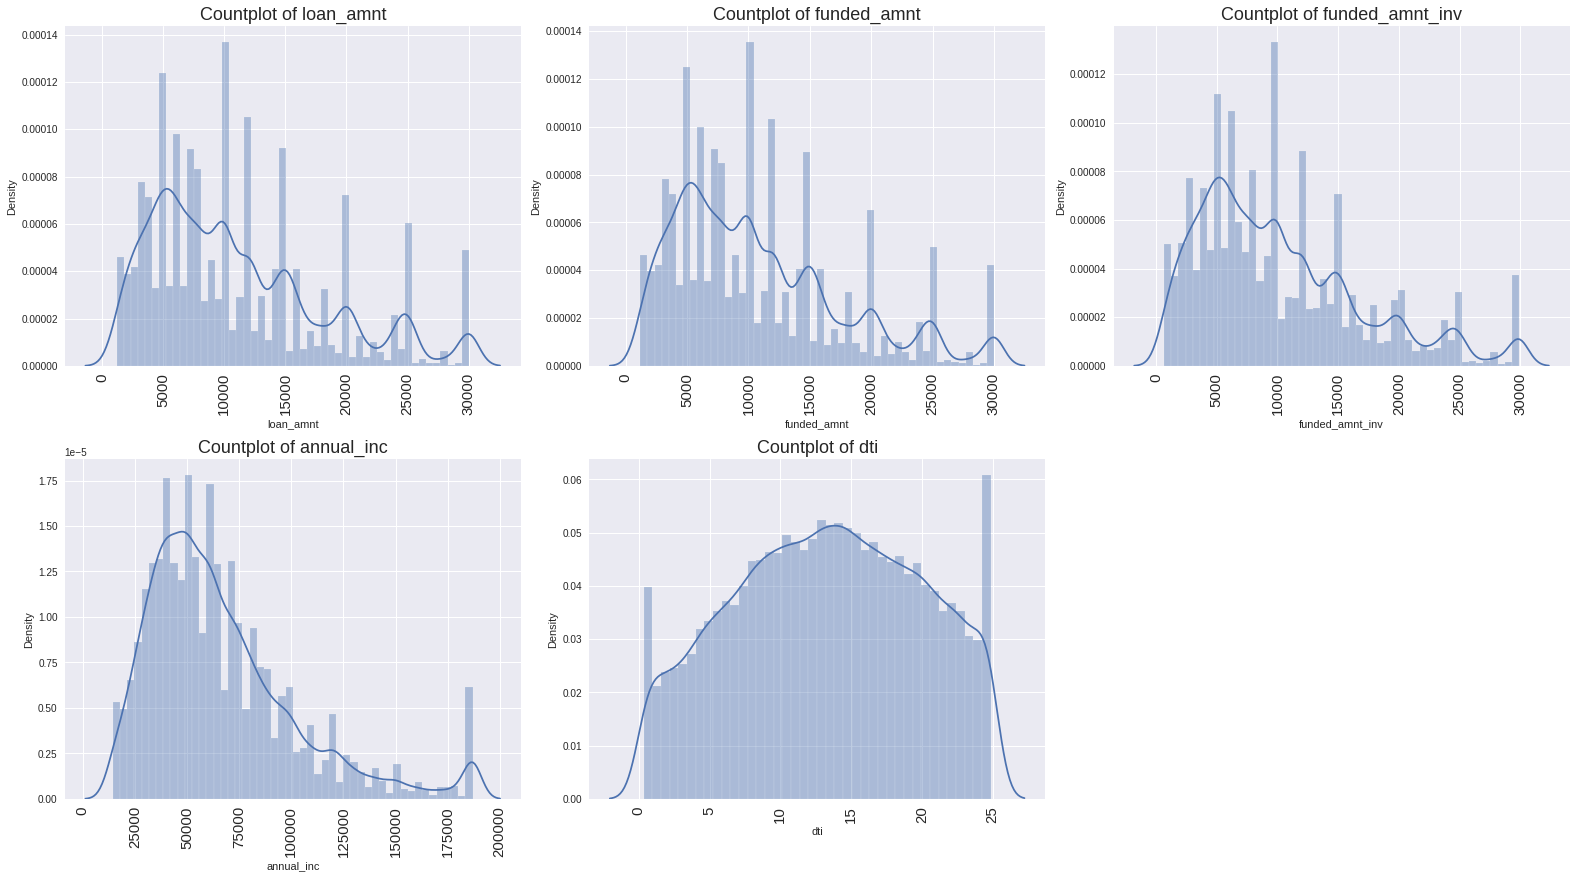

In [ ]:
plt.figure(figsize=(22,300))
for i in range(len(col_num)):
  plt.subplot(50,3,i+1)
  sns.distplot(df[col_num[i]])
  plt.title(f"Countplot of {col_num[i]}",fontsize=18)
  plt.xticks(rotation=90,fontsize=15)
  plt.tight_layout()

In [ ]:
df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'dti'], dtype='object')

## Bivariate analysis of numeric features

Text(0, 0.5, 'Debt to income ratio')

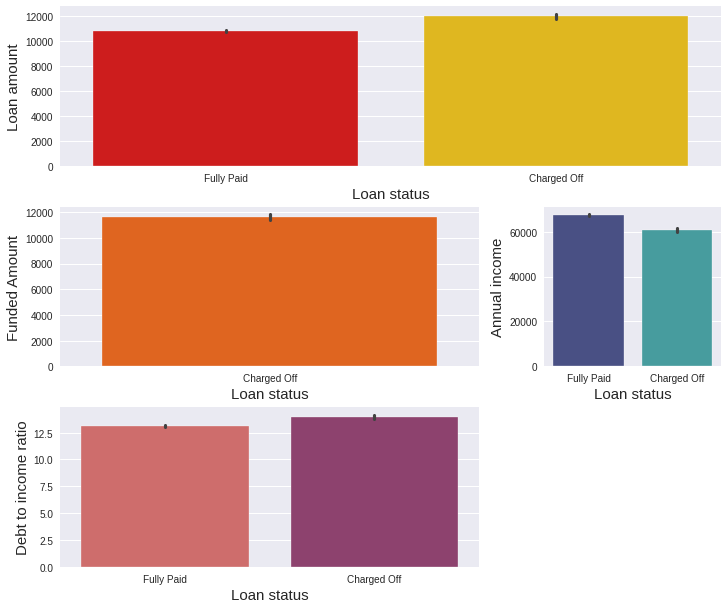

In [ ]:
#we can create n number of graph with the below code
fig=plt.figure(constrained_layout=True,figsize=(10,15))
gs=GridSpec(6,3,figure=fig)

plt.subplot(gs[0,:])
a1=sns.barplot(data=df,x="loan_status",y="loan_amnt",estimator=mean,palette='hot')
plt.xlabel("Loan status",fontsize=15)
plt.ylabel("Loan amount",fontsize=15)

plt.subplot(gs[1,:-1])
a1=sns.barplot(data=df_new,x="loan_status",y="funded_amnt",estimator=mean,palette='hot')
plt.xlabel("Loan status",fontsize=15)
plt.ylabel("Funded Amount",fontsize=15)

plt.subplot(gs[1,-1])
a1=sns.barplot(data=df,x="loan_status",y="annual_inc",estimator=mean,palette='mako')
plt.xlabel("Loan status",fontsize=15)
plt.ylabel("Annual income",fontsize=15)

plt.subplot(gs[2,:-1])
a1=sns.barplot(data=df,x="loan_status",y="dti",estimator=mean,palette='flare')
plt.xlabel("Loan status",fontsize=15)
plt.ylabel("Debt to income ratio",fontsize=15)

In [ ]:
df_new['loan_amnt'].value_counts().head(10)     ## sorting charged_off borrowers by loan_amount

10000    362
12000    303
5000     287
15000    259
25000    252
30000    249
20000    225
6000     213
8000     208
4000     149
Name: loan_amnt, dtype: int64

# Observations for categorical features:<br>

1) We can observe that, 36 months loan are given very high compared to 60 months loan, and when we compared it with loan_status we found that those customers who charged_off have nearly 1:1 ratio for both terms. Fully paid clients are majorly in 36 months loan tenure. So there is high chance that 60 months term loan borrower will more likely to get defaulted.<br>

2) Sub_grade categories which depicted high number of charged_off clients are B5,B4, B3, C1, C2, D2, D3 & D4.<br>

3) Employment length is not driving factor in our case, as it is equally distributed across all types of employment length.<br>

4) Loan borrowers who has their own home ownership is very less, while 'rent' and 'mortgage" are high.<br>

5) Here, Verification_status is playing major role- we can see that major applicants are not verified but 'charged-off' applicants are same in not_verified and verified categories. So there should be required modification on verification process. <br>

6) Debt_consolidation is the purpose which has nearly 40% loan borrowers which followed by credit_card. Here, verification process should be stringent as major loan_defulat occurs here.<br>

7) Interest_rate:Out of charged_off borrowers, it is observed that when interest_rate >=9.99% there is high probability that borrower may get charged_off. 




# Observations for numeric features

8)loan_amount given is symmetrically reducing from 10k to 30k and highest loans are given for 10k $. Out of all borrowers who applied beyond 10k loan are more likely to get defaulted.<br>

9) Nearly 70%  Installments paid by client is ranging from 100 to 400 $ , after 400$ it reduced drastically. But one point to note that around 900 $ there is surge in installment paid by clients.<br>

10) Annual_income of clients is having same nature as their installments, which is but obvious thing. And it is ranging from 35k to 75k in huge amount.<br>

11) Debt to income ratio- showing normal distribution, ratio 
ranging from 0 to 25. DTI ratio is high for the charged-off borrowers compared to fully paid borrowers.<br>

12)Loan_amount , Funded amount and Funded amount by investors is highly correlated which can be shown from correlation matrix.

13) Loan_amount and annual_income is not correlated anymore-- it should be correlated linearly then & then chances of  default  borrowers will reduce.<br> 

14) Average Loan_amount given to borrower is high for verified borrower as well as those whose home ownership is mortgage or rent.<br>

15) Average annual income is low for the borrowers who are charged off compared to fully_paid borrowers<br>

16) Funded amount given to charged_off borrowers is high than fully_paid borrowers.